In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Data Visualisation

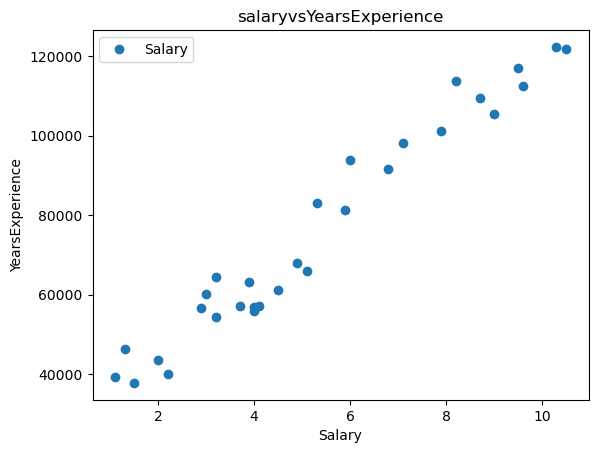

In [7]:
data.plot(x='YearsExperience',y='Salary',style='o')
plt.title('salaryvsYearsExperience')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()

In [9]:
from scipy.stats import pearsonr
corr,_= pearsonr(data['Salary'],data['YearsExperience'])
print('pearsons correlation:%.3f'% corr)
from scipy.stats import spearmanr
corr,_=spearmanr(data['Salary'],data['YearsExperience'])
print('Spearmans correlation:%.3f'% corr)

pearsons correlation:0.978
Spearmans correlation:0.957


C:\Users\Santosh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


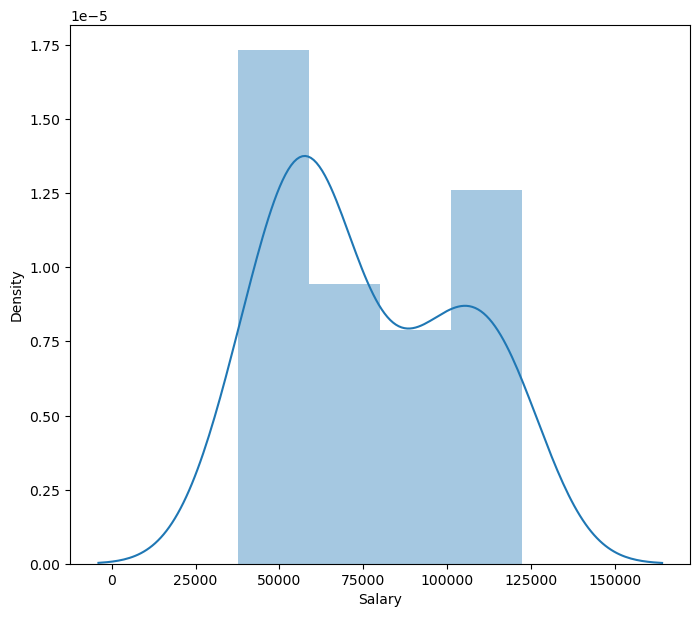

In [13]:
import seaborn as sns
plt.figure(figsize=(8,7))
plt.tight_layout()
sns.distplot(data['Salary'])
plt.show()

C:\Users\Santosh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


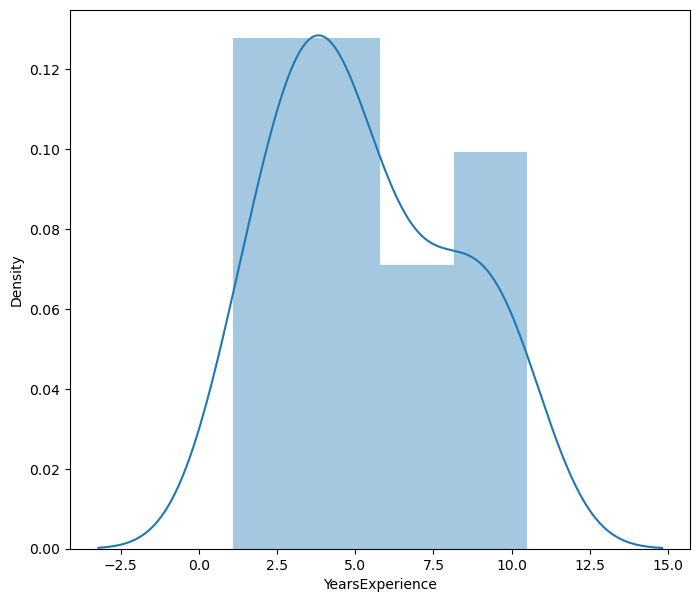

In [14]:
plt.figure(figsize=(8,7))
plt.tight_layout()
sns.distplot(data['YearsExperience'])
plt.show()

In [30]:
X=data['YearsExperience'].values.reshape(-1,1)
print(X)
y=data['Salary'].values.reshape(-1,1)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
predict_reg = LinearRegression()

Train the model using linear regression

In [34]:
predict_reg.fit(X_train,y_train)

LinearRegression()

In [35]:
print('intercept value of model is ',predict_reg.intercept_)
print('coefficient value of model is',predict_reg.coef_)


intercept value of model is  [25321.58301178]
coefficient value of model is [[9423.81532303]]


In [36]:
y_pred = predict_reg.predict(X_test)

In [37]:
pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(),'predict':y_pred.flatten()})
pmsh_pf

,Actual,predict
0,112635.0,115790.210113
1,67938.0,71498.278095
2,113812.0,102596.868661
3,83088.0,75267.804224
4,64445.0,55477.792045
5,57189.0,60189.699707


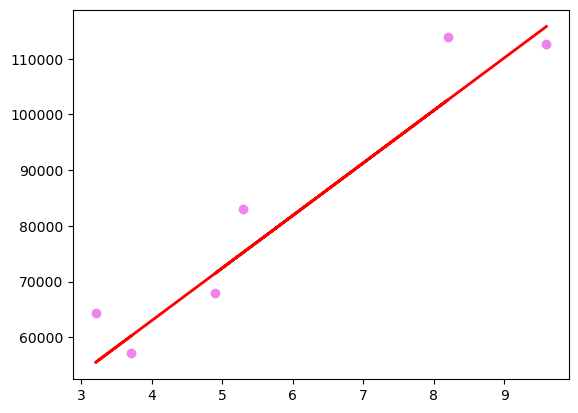

In [38]:
plt.scatter(X_test,y_test,color = 'violet')
plt.plot(X_test,y_pred,color = 'red',linewidth=2)
plt.show()

In [39]:
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R^2 score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error : 6286.453830757749
Mean squared Error: 49830096.85590839
Root mean squared error: 7059.04362190151
R^2 score: 0.9024461774180497


Logirthem Transformation

y=a+b*log(x)

In [40]:
#input data set

X_log = np.log(data['YearsExperience'].values.reshape(-1,1))

#output or predicted value of data
y_log = data['Salary'].values.reshape(-1,1)

In [41]:
X_train_log,X_test_log,y_train_log,y_test_log = train_test_split(X_log,y_log,test_size=0.2,random_state=42)

In [42]:
y_pred_log = LinearRegression()
y_pred_log.fit(X_train_log,y_train_log)

LinearRegression()

In [43]:
print("intercept value of model is ",y_pred_log.intercept_)
print("coefficient value of model is",y_pred_log.coef_)

intercept value of model is  [16808.04207062]
coefficient value of model is [[39297.91674992]]


In [44]:
log_model = y_pred_log.predict(X_test_log)
log_model

array([[105690.62002247],
       [ 79261.67485733],
       [ 99496.13089578],
       [ 82345.44586818],
       [ 62517.44576196],
       [ 68222.79629842]])

In [45]:
pmsh_pf_1 = pd.DataFrame({'Actual':y_test_log.flatten(),'Predict':log_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,112635.0,105690.620022
1,67938.0,79261.674857
2,113812.0,99496.130896
3,83088.0,82345.445868
4,64445.0,62517.445762
5,57189.0,68222.796298


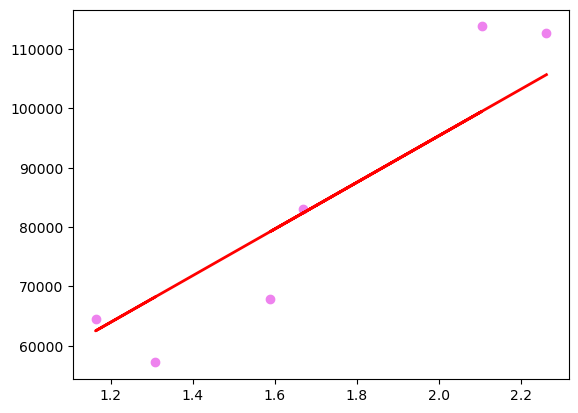

In [47]:
plt.scatter(X_test_log,y_test_log,color = 'violet')
plt.plot(X_test_log,log_model,color='red',linewidth=2)
plt.show()

calculate error rate of logrithm transformation model

In [49]:
print('mean absolute error:',metrics.mean_absolute_error(y_test_log,log_model))
print('mean squared error:',metrics.mean_squared_error(y_test_log,log_model))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test_log,log_model)))
print('R^2 score:',metrics.r2_score(y_test_log,log_model))

mean absolute error: 7714.638101223965
mean squared error: 84567607.74831854
root mean squared error: 9196.064796874723
R^2 score: 0.8344395471211845


Exponential transformation model

log(y) = α+β×+Ɛ

In [50]:
#input dataset

X_elog = data['YearsExperience'].values.reshape(-1,1)

#output
y_elog = np.log(data['Salary'].values.reshape(-1,1))

In [52]:
X_train_exp,X_test_exp,y_train_exp,y_test_exp = train_test_split(X_elog,y_elog,test_size=0.2,random_state=42)

In [54]:
exp_model = LinearRegression()
exp_model.fit(X_train_exp,y_train_exp)


LinearRegression()

In [56]:
print('exponential intercept value of model',exp_model.intercept_)
print('expenential coefficient value of model',exp_model.coef_)

exponential intercept value of model [10.48525073]
expenential coefficient value of model [[0.12704681]]


In [57]:
exp_model_pred = exp_model.predict(X_test_exp)
exp_model_pred

array([[11.70490014],
       [11.10778012],
       [11.5270346 ],
       [11.15859884],
       [10.89180053],
       [10.95532394]])

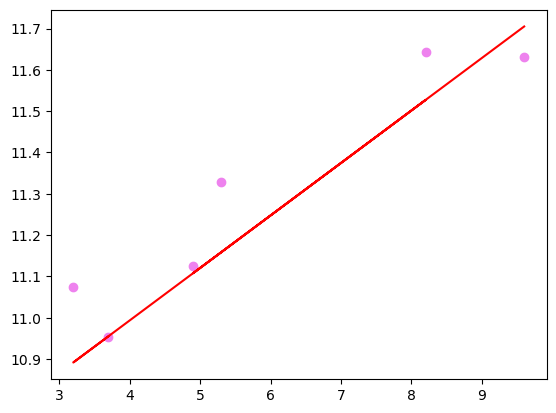

In [58]:
plt.scatter(X_test_exp,y_test_exp,color = 'violet')
plt.plot(X_test_exp,exp_model_pred,color='red')
plt.show()

In [60]:
print('mean absolute error:',metrics.mean_absolute_error(y_test_exp,exp_model_pred))
print('mean squared error:',metrics.mean_squared_error(y_test_exp,exp_model_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test_exp,exp_model_pred)))
print('R^2 Score:',metrics.r2_score(y_test_exp,exp_model_pred))

mean absolute error: 0.09314373254401727
mean squared error: 0.013430075287585596
root mean squared error: 0.11588820167551828
R^2 Score: 0.8120949075482874
